### 步骤 1	导入常用包

In [2]:

# 导入常用包NumPy库和pandas库。
# 	NumPy库中的函数可以实现对数组的基本操作；
# 	pandas库提供了诸多的数据处理方法和时间序列的操作方法。
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")




### 步骤 2	从本地磁盘读取数据

In [5]:

# 地址为数据集dataset-credit-default.csv所在磁盘位置。
df = pd.read_csv("./data/dataset-credit-default.csv",encoding='utf-8', engine='python')
df

,Cust_No,Target,Nation,Birth_Place,Gender,Age,Marriage_State,Highest Education,House_State,Work_Years,...,ZX_Max_Overdue_Account,ZX_Link_Max_Overdue_Amount,ZX_Total_Overdu_Months,ZX_Max_Overdue_Duration,ZX_Max_Credits,ZX_Max_Credit_Banks,ZX_Max_Overdue_Credits,ZX_Credit_Max_Overdu_Amount,ZX_Credit_Total_Overdue_Months,ZX_Credit_Max_Overdue_Duration
0,0,0,1.0,330621,1,41,20.0,61.0,NaN,0,...,1,8,1,1,0,0,0,0,0,0
1,1,0,1.0,330621,1,41,20.0,71.0,1.0,0,...,1,0,3,1,2,1,0,0,0,0
2,2,0,1.0,330621,1,55,40.0,71.0,1.0,0,...,1,0,2,1,1,1,0,0,0,0
3,3,0,1.0,330621,1,41,20.0,61.0,1.0,68624,...,0,0,0,0,1,1,0,0,0,0
4,4,0,1.0,330621,0,40,99.0,90.0,1.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6457,6457,0,NaN,330621,1,40,20.0,21.0,1.0,0,...,0,0,0,0,0,0,0,0,0,0
6458,6458,0,1.0,330621,1,52,20.0,90.0,1.0,0,...,1,105,1,1,1,1,0,0,0,0
6459,6459,0,1.0,330621,0,32,10.0,31.0,1.0,68625,...,0,0,0,0,0,0,0,0,0,0
6460,6460,0,1.0,330621,1,51,99.0,71.0,1.0,0,...,0,0,0,0,2,2,0,0,0,0


### 步骤 3	可视化数据

In [7]:

# 读取数据前五行，查看数据属性列。
df.head()
# 查看数据行列数。
df.shape
# 输出如下：
# (6462, 34)

# 查看Target的分布。
# 数据集中有6341条数据target为0，121条数据target为1，数据集极度不均衡，后续需进行不均衡数据处理。
df['Target'].value_counts()

0    6341
1     121
Name: Target, dtype: int64

### 步骤 4	数据处理

In [ ]:

# 数据处理包括缺失值处理、异常值处理、特征降维、特征构造等。详细信息见实验手册《银行对私信贷数据特征工程构造实验手册》。
# 本环节需进行以下的数据处理步骤：
# （1）删除共线属性；
# （2）数值型变量异常值和缺失值处理；
# （3）类别型变量异常值和缺失值处理。
# *************************************************知识点讲解***********************************************************8
# （1）Matplotlib和seaborn是Python的数据可视化包。
# 	Matplotlib可绘制条形图，散点图，条形图，饼图，堆叠图等；
# 	seaborn是对Matplotlib的扩展。使用%matplotlib inline可省略plt.show()。
# Python中seaborn的heatmap()函数，其基本格式如下：
# seaborn.heatmap(data, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, 
# fmt=’.2g’, annot_kws=None, linewidths=0, linecolor=’white’, cbar=True, cbar_kws=None, cbar_ax=None, 
# square=False, ax=None, xticklabels=True, yticklabels=True, mask=None, **kwargs)
# heatmap()函数关键参数详解：
# 	data：矩阵数据集，可以是NumPy的数组（array），也可以是DataFrame。如果是DataFrame，那么df的index/column信息会分别对应到heatmap的columns和rows。
# 	linewidths：热力图矩阵之间的间隔大小。
# 	vmax,vmin：图例中最大值和最小值的显示值，没有该参数时默认不显示。
# （2）pandas库中的corr()函数。
# pandas库自带corr()函数，可实现相关系数计算。相关系数反映的是两个变量之间变化趋势的方向以及程度，值范围是[-1,1]。0表示两个变量不相关，正值表示正相关，负值表示负相关，值越大相关性越强。
# DataFrame.corr(method='pearson', min_periods=1)
# corr()函数关键参数详解：
# 	method：{‘pearson’, ‘kendall’, ‘spearman’}
# 	pearson：表示皮尔逊相关系数，适用于连续数据，正态分布数据，线性关系数据；
# 	kendall：表示肯德尔相关系数，也是一种秩相关系数，适合于定序变量或不满足正态分布假设的等间隔数据；
# 	spearman：表示斯皮尔曼相关系数，适合于定序变量或不满足正态分布假设的等间隔数据。
# （3）One-Hot编码：一位有效编码。
# 对于离散特征可以采用One-Hot编码的方式来处理，使用M位状态寄存器对M个状态进行编码，M个变量用M维表示，每个维度的数值或为1，或为0。
# 独热编码的实现使用Python中sklearn库的OneHotEncoder()函数，其基本格式如下：
# OneHotEncoder(n_values='auto', categorical_features='all', dtype=<class 'numpy.float64'>, sparse=True, handle_unknown='error')
# OneHotEncoder()函数关键参数详解：
# 	n_values=auto，默认为auto，表示每个特征使用几维的数值是由数据集自动推断的，即几种类别就使用几位来表示，也可以手动设置； 
# 	categorical_features=all，默认为all，表示对所有类别的特征都进行编码，也可以通过索引值或者bool值来指定部分特征进行编码；
# 	dtype=<class 'numpy.float64'>，表示编码数值格式，默认是浮点型；
# 	sparse=True，默认为True，表示编码的格式为稀疏的格式。若sparse=False则不用使用toarray()；
# 	handle_unknown=error，表示遇到未知的类别时返回的值，若为error，则返回error；若为ignore，则返回ignore。
# （4）Label-Encoding：标签编码。
# 有序分类变量数值之间存在一定的顺序关系，可直接使用划分后的数值进行数据建模。如分类变量{female，male}，可以直接离散化为{1,0}。
# 有序分类变量的离散化的实现使用Python中pandas库的map()函数，其基本使用格式如下：
# map(func, *iterables)


### 步骤 5	导入相关包

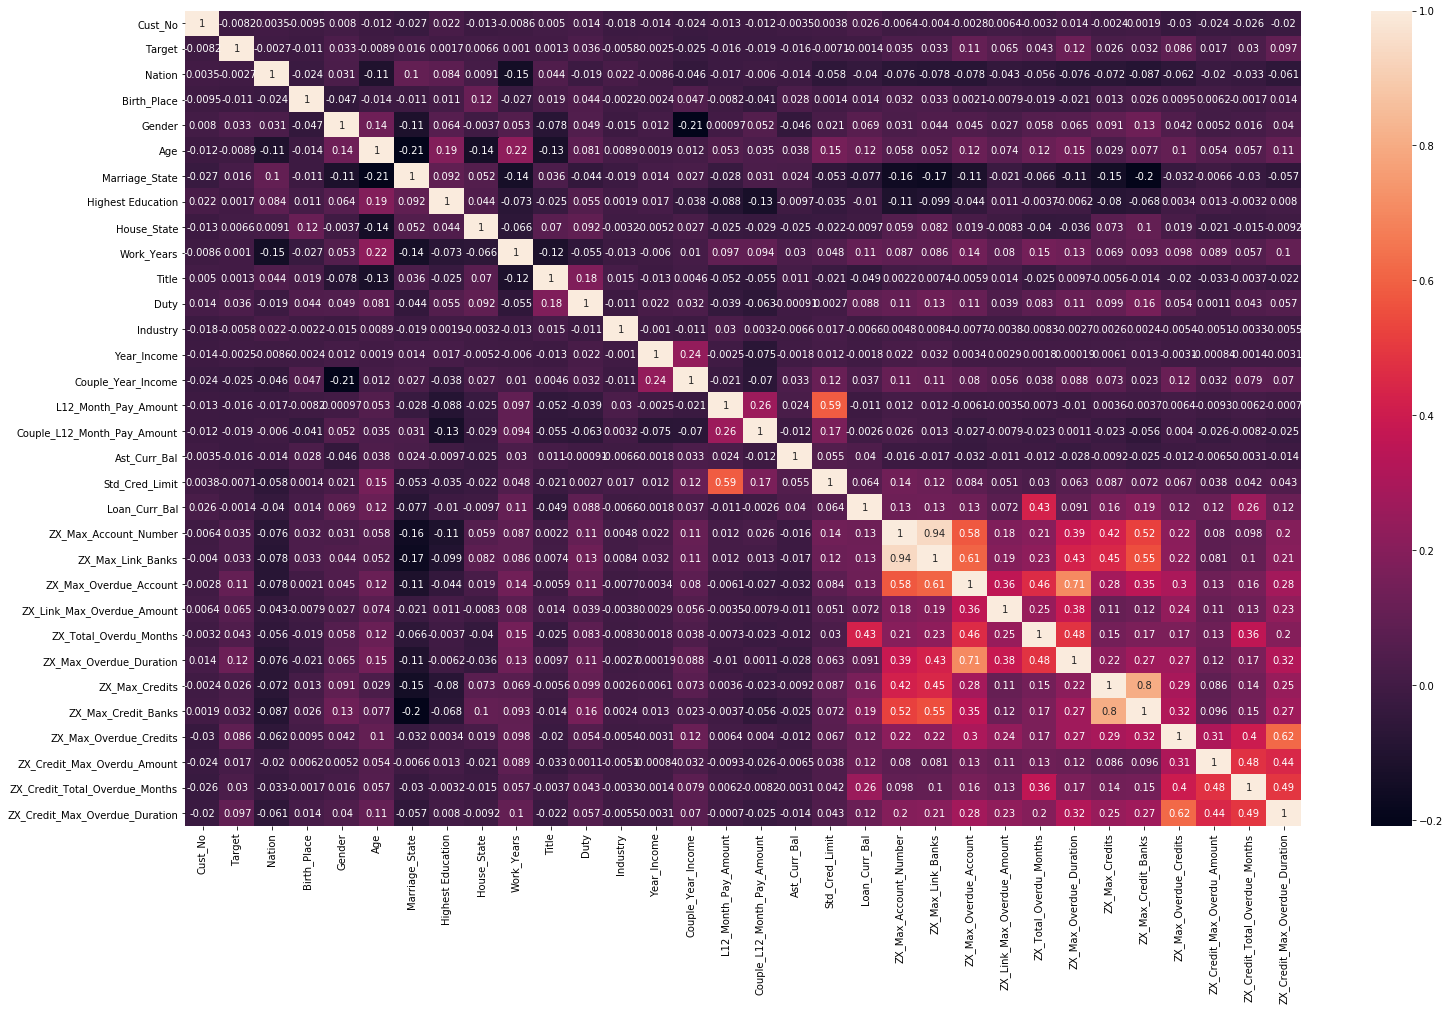

In [9]:

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt



###	步骤6 删除共线属性

In [10]:

# 使用seaborn提供的热力图展现属性与属性之间的相关性。越接近于1的特征相关度越高，根据工程经验，属性之间的相关系数超过0.8即为共线属性，需选择其中一个属性删除。
#计算特征相关性并可视化
corr_matrix = df.corr(method='pearson')
plt.figure(figsize=(25, 15))
#生成热力图 annot参数是指显示数据 
sns.heatmap(corr_matrix, annot= True)
# 对于属性之间相关性过高的的特征，根据工程经验，以0.8为界，相关系数等于或大于0.8的，删除其中一个属性。
cols_pair_to_drop = []
for index_ in corr_matrix.index:
    for col_ in corr_matrix.columns:
        if corr_matrix.loc[index_,col_] >= 0.8 and index_!=col_ and (col_,index_) not in cols_pair_to_drop:
            cols_pair_to_drop.append((index_,col_))
#丢弃其中一个特征对
cols_to_drop = np.unique([col[1] for col in cols_pair_to_drop])
df.drop(cols_to_drop,axis=1,inplace=True)
df.head()


,Cust_No,Target,Nation,Birth_Place,Gender,Age,Marriage_State,Highest Education,House_State,Work_Years,...,ZX_Max_Account_Number,ZX_Max_Overdue_Account,ZX_Link_Max_Overdue_Amount,ZX_Total_Overdu_Months,ZX_Max_Overdue_Duration,ZX_Max_Credits,ZX_Max_Overdue_Credits,ZX_Credit_Max_Overdu_Amount,ZX_Credit_Total_Overdue_Months,ZX_Credit_Max_Overdue_Duration
0,0,0,1.0,330621,1,41,20.0,61.0,NaN,0,...,0,1,8,1,1,0,0,0,0,0
1,1,0,1.0,330621,1,41,20.0,71.0,1.0,0,...,2,1,0,3,1,2,0,0,0,0
2,2,0,1.0,330621,1,55,40.0,71.0,1.0,0,...,2,1,0,2,1,1,0,0,0,0
3,3,0,1.0,330621,1,41,20.0,61.0,1.0,68624,...,1,0,0,0,0,1,0,0,0,0
4,4,0,1.0,330621,0,40,99.0,90.0,1.0,0,...,4,0,0,0,0,0,0,0,0,0


### 步骤 7	数值型变量异常值和缺失值处理

In [11]:

# 统计各特征的缺失率并按照降序排列，即ascending=False。
df_missing_stat = pd.DataFrame(df.isnull().sum()/df.shape[0],columns=['missing_rate']).reset_index()
df_missing_stat.sort_values(by='missing_rate',ascending=False)[:15]


,index,missing_rate
16,Couple_Year_Income,0.689260
18,Couple_L12_Month_Pay_Amount,0.689260
10,Unit_Kind,0.621634
11,Title,0.571804
14,Industry,0.564222
12,Occupation,0.555091
8,House_State,0.397864
2,Nation,0.330703
6,Marriage_State,0.309037
7,Highest Education,0.299133


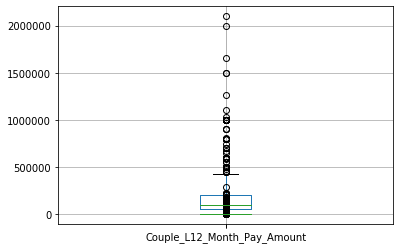

In [12]:
# 采用箱形图可视化属性，查看数据分布后，判定如何填充。
df.boxplot(column=['Couple_Year_Income'])
 
df.boxplot(column=['Couple_L12_Month_Pay_Amount'])


In [13]:
# 从Couple_Year_Income和Couple_L12_Month_Pay_Amount两个箱形图中可得到，两个属性的缺失值和异常值较为严重。
# 可在删除带有异常值的样本的基础上填充缺失值，一般有两种选择：
# 	对数值型变量常用中位数填充缺失值，且在该业务场景下，使用中位数填充缺失值也符合实际的分布；
# 	直接删除。
# 按照经验，这两个属性和客户的还款能力有关，因此先尝试删除异常值，并填充缺失值。
# 删除Couple_Year_Income的异常值的索引，并用中位数填补缺失值。
item = 'Couple_Year_Income'
iqr = df[item].quantile(0.75) - df[item].quantile(0.25)
q_abnormal_L = df[item] < df[item].quantile(0.25) - 1.5 * iqr
q_abnormal_U = df[item] > df[item].quantile(0.75) + 1.5 * iqr
print(item + '中有' + str(q_abnormal_L.sum() + q_abnormal_U.sum()) + '个异常值')
item_outlier_index = df[q_abnormal_L|q_abnormal_U].index
df.drop(index = item_outlier_index,inplace=True)
print(df.shape)
df[item] = df[item].fillna(df[item].median())
# 删除Couple_L12_Month_Pay_Amount的异常值的索引，并用中位数填补缺失值。
item = 'Couple_L12_Month_Pay_Amount'
iqr = df[item].quantile(0.75) - df[item].quantile(0.25)
q_abnormal_L = df[item] < df[item].quantile(0.25) - 1.5 * iqr
q_abnormal_U = df[item] > df[item].quantile(0.75) + 1.5 * iqr
print(item + '中有' + str(q_abnormal_L.sum() + q_abnormal_U.sum()) + '个异常值')
item_outlier_index = df[q_abnormal_L|q_abnormal_U].index
df.drop(index = item_outlier_index,inplace=True)
print(df.shape)
df[item] = df[item].fillna(df[item].median())


Couple_Year_Income中有131个异常值
(6331, 32)
Couple_L12_Month_Pay_Amount中有372个异常值
(5959, 32)


### 步骤 8	类别型变量异常值和缺失值处理

In [14]:

# 经步骤6得知，Unit_Kind、Title、Industry、Occupation、House_State、Nation，Marriage_State，Highest Education和Duty有缺失值，可对变量进行重新编码，方法有Label-Encodeing和One-Hot两种。
# 	Label-Encodeing：是对每个类别随即分配一个整数值，如Femal和Male分别为0和1。当模型使用这些数据的时候，可能会有干扰，无法体现数据的权重．因此，对于特征值类别只有两类的数据，推荐使用label encodeing。
# 	One-Hot编码：当特征值的种类较多的话，会造成稀疏矩阵。．
# 可视化这些属性，查看是否有属性超过2个以上数值。可视化属性发现，属性Occupation含有多个数值。
# 因此本例将所有分类变量使用众数填充缺失值，并采用one-hot编码处理数据。
# plt.hist(df['Occupation'].value_counts(),color='b')
# 输出如下：
 
#使用中位数填充异常值
nominal_features = ['Nation','Birth_Place','Gender','Marriage_State','Highest Education','House_State','Work_Years','Unit_Kind','Title',
                   'Occupation','Duty','Industry']
numerical_features = [col_ for col_ in nominal_features if col_ not in nominal_features]
#调用Pandas的get_dummies方法
df_after_dummy = pd.get_dummies(df,columns=nominal_features,dummy_na=True)
